### Dataset link- https://drive.google.com/file/d/1IArJ2sc6Eq0Cj_LMpCBbVDUNAjP2DHn4/view?usp=share_link


In [44]:
#Required Library
import pandas as pd
import numpy as np
import csv
#for Sql 
import sqlite3 as sq
from pathlib import Path
#for visualzation
import matplotlib.pyplot as plt

In [2]:
#create a database because of our tedtalk file is stored in CSV
def db_init():
    db = Path('ted-talk-data.sqlite2').touch()
    return db
db_init()

In [3]:
path = "./"
database = path + 'ted-talk-data.sqlite2'
#Make a connection with DB file
conn = sq.connect(database)

In [4]:
#Create table systet
create_table='''CREATE TABLE tedtalk0(
title TEXT,
author TEXT,
date DATETIME,
view INTEGER,
likes INTEGER,
link TEXT
);
'''

In [5]:
#now let's create a cursor for excuting the sql quary on db file
cursor=conn.cursor()
#create a table
cursor.execute(create_table)

In [6]:
# read the content of the file and store it in a list
file = open(r"C:\pythone\Masai\Sql_project_by_python\dataset\data.csv", encoding="utf8")
content = list(csv.reader(file))
# content
# # our file has a header row that needs to be skipped
content = content[1:]
# content
# convert the date to a usable SQLITE format
for i in range(len(content)):
    content[i][2]=str(pd.to_datetime(content[i][2]))
file.close()

In [7]:
#insert this data into tedtalk table
insert_table='''INSERT INTO tedtalk0 
VALUES(?,?,?,?,?,?)'''

#sql cursor
cursor.executemany(insert_table, content)

In [8]:
# 5 data
pd.read_sql('SELECT * FROM tedtalk0 LIMIT 5', conn)

,title,author,date,view,likes,link
0,Climate action needs new frontline leadership,Ozawa Bineshi Albert,2021-12-01 00:00:00,404000,12000,https://ted.com/talks/ozawa_bineshi_albert_cli...
1,The dark history of the overthrow of Hawaii,Sydney Iaukea,2022-02-01 00:00:00,214000,6400,https://ted.com/talks/sydney_iaukea_the_dark_h...
2,How play can spark new ideas for your business,Martin Reeves,2021-09-01 00:00:00,412000,12000,https://ted.com/talks/martin_reeves_how_play_c...
3,Why is China appointing judges to combat clima...,James K. Thornton,2021-10-01 00:00:00,427000,12000,https://ted.com/talks/james_k_thornton_why_is_...
4,Cement's carbon problem — and 2 ways to fix it,Mahendra Singhi,2021-10-01 00:00:00,2400,72,https://ted.com/talks/mahendra_singhi_cement_s...


In [9]:
#total number of tedtalk
rows=pd.read_sql('''SELECT count(*) FROM tedtalk0''', conn)
rows

,count(*)
0,5440


In [10]:
#before move forwark let's check distinct value in title and author

In [11]:
distinct_author=pd.read_sql('''SELECT DISTINCT(author) FROM tedtalk0
''', conn)
distinct_author

,author
0,Ozawa Bineshi Albert
1,Sydney Iaukea
2,Martin Reeves
3,James K. Thornton
4,Mahendra Singhi
...,...
4439,Jennifer Lin
4440,Sirena Huang
4441,Jeff Han
4442,Jehane Noujaim


#### here we can see there are 4444 unique author means there are some author who talk more the 1 times so let's find out those author 

In [12]:
author=pd.read_sql('''SELECT author, count(author) as times FROM tedtalk0
group by author
HAVING count(author)>1
''', conn)
author

,author,times
0,OK Go,2
1,TED-Ed,7
2,A.J. Jacobs,6
3,Achim Steiner,2
4,Adam Grant,4
...,...,...
531,Yvonne Aki-Sawyerr,2
532,Ze Frank,3
533,Zeynep Tufekci,3
534,ZigZag,2


#### These are author who had multiple tedtalk 

#### now lets find out who's autor had maximum tedtalk and number of tedtalk

In [13]:
pd.read_sql(''' with cte as(
SELECT author, count(author) as times FROM tedtalk0
group by author
HAVING count(author)>1
)
SELECT author, max(times) from cte
''', conn)

,author,max(times)
0,Alex Gendler,45


#### here we can see "Alex Gendler" author had maximum 45 tedtalk 

#### let's try to give rank also best on number of tedtalk

In [14]:
author_rank=pd.read_sql('''with cte as(
SELECT author, count(*) as times FROM Tedtalk0
GROUP BY author
HAVING count(*) >1
)
SELECT *, rank() over(order by times desc) as rank FROM cte
''', conn)
author_rank

,author,times,rank
0,Alex Gendler,45,1
1,Iseult Gillespie,33,2
2,Matt Walker,18,3
3,Alex Rosenthal,15,4
4,Elizabeth Cox,13,5
...,...,...,...
531,Yuko Munakata,2,178
532,Yves Morieux,2,178
533,Yvonne Aki-Sawyerr,2,178
534,ZigZag,2,178


#### So here we can see the rank of author who had more then 1 tedtalk

In [15]:
distinct_title=pd.read_sql('''SELECT DISTINCT(title) FROM tedtalk0
''', conn)
distinct_title

,title
0,Climate action needs new frontline leadership
1,The dark history of the overthrow of Hawaii
2,How play can spark new ideas for your business
3,Why is China appointing judges to combat clima...
4,Cement's carbon problem — and 2 ways to fix it
...,...
5435,The best stats you've ever seen
5436,Do schools kill creativity?
5437,Greening the ghetto
5438,Simplicity sells


#### Every title are unique means there is no duplicate data

In [16]:
#total number of view 
total_view=pd.read_sql('''SELECT sum(View) as total_view from tedtalk0
''', conn)
total_view

,total_view
0,11214973211


In [17]:
#total_like
total_like=pd.read_sql('''SELECT SUM(likes) as total_likes
FROM tedtalk0''', conn)
total_like

,total_likes
0,340585435


In [18]:
# title	author	date	view	likes	link

In [19]:
#Earliest 5 tedtalk
ear_tedtalk=pd.read_sql('''SELECT title, date FROM tedtalk0
order by date asc limit 5
''', conn)
ear_tedtalk

,title,date
0,Innovations in sleep,1970-01-01 00:00:00
1,Love letters to what we hold dear,1970-01-01 00:00:00
2,Why believe in others,1972-05-01 00:00:00
3,Physics is fun to imagine,1983-07-01 00:00:00
4,"5 predictions, from 1984",1984-02-01 00:00:00


In [20]:
#latest 5 tedtalk
latest_tedtalk=pd.read_sql('''SELECT title, date FROM tedtalk0
ORDER BY date desc LIMIT 5
''', conn)
latest_tedtalk

,title,date
0,The dark history of the overthrow of Hawaii,2022-02-01 00:00:00
1,The myth of Narcissus and Echo,2022-02-01 00:00:00
2,What nature can teach us about sustainable bus...,2022-02-01 00:00:00
3,How do jetpacks work? And why don't we all hav...,2022-02-01 00:00:00
4,"What is ""normal"" and what is ""different""?",2022-02-01 00:00:00


In [21]:
#top 5 tedtalk which got maximum like 
maximum_like_top_5=pd.read_sql('''SELECT title, date , max(likes) as like FROM TEDTALK0
GROUP BY title, author, view
ORDER BY like desc limit 5
''', conn)

In [22]:
maximum_like_top_5

,title,date,like
0,Do schools kill creativity?,2006-02-01 00:00:00,2100000
1,Your body language may shape who you are,2012-06-01 00:00:00,1900000
2,Inside the mind of a master procrastinator,2016-02-01 00:00:00,1800000
3,How great leaders inspire action,2009-09-01 00:00:00,1700000
4,The power of vulnerability,2010-06-01 00:00:00,1700000


#### These 5 tedtalk got maximum like 

In [23]:
minimum_like=pd.read_sql('''SELECT title, date, min(likes) as like FROM TEDTALK0
GROUP BY title, author, view
ORDER BY like asc limit 5
''', conn)
minimum_like

,title,date,like
0,Year In Ideas 2015,2015-12-01 00:00:00,15
1,Post-Pandemic Paradise in Rapa Nui,2020-10-01 00:00:00,37
2,Virtual Worlds,2020-11-01 00:00:00,39
3,"""Jamie Raeburn"" / ""Baloo Baleerie"" / ""Twa recr...",2019-07-01 00:00:00,40
4,"""Part II. The Journey Through Time"" / ""Ruslan ...",2018-11-01 00:00:00,40


#### These 5 tedtalk got minimum like

In [24]:
#top 5 tedtalk which got maximum views

In [25]:
maximum_view=pd.read_sql('''SELECT title, date, max(view) as view FROM tedtalk0
GROUP BY title, author
ORDER BY view desc limit 5
''', conn)
maximum_view

,title,date,view
0,Do schools kill creativity?,2006-02-01 00:00:00,72000000
1,Your body language may shape who you are,2012-06-01 00:00:00,64000000
2,Inside the mind of a master procrastinator,2016-02-01 00:00:00,60000000
3,How great leaders inspire action,2009-09-01 00:00:00,57000000
4,The power of vulnerability,2010-06-01 00:00:00,56000000


#### These are 5 top tedtalk which got Maximum view

### Here one noticable think is those video got maximum view they has maximum like also mean view and likes are correlated to each other

In [26]:
#top 5 tedtalk which got minimum views

In [27]:
minimum_view=pd.read_sql('''SELECT title, date, min(view) as view FROM tedtalk0
GROUP BY title, author
ORDER BY view asc limit 5
''', conn)
minimum_view

,title,date,view
0,Year In Ideas 2015,2015-12-01 00:00:00,532
1,Post-Pandemic Paradise in Rapa Nui,2020-10-01 00:00:00,1200
2,"""Jamie Raeburn"" / ""Baloo Baleerie"" / ""Twa recr...",2019-07-01 00:00:00,1300
3,"""Part II. The Journey Through Time"" / ""Ruslan ...",2018-11-01 00:00:00,1300
4,Virtual Worlds,2020-11-01 00:00:00,1300


#### these 5 tedtalk got minimum views

In [28]:
# Now i want to fetch data based on time so 1st let's make different column for year, monthe and day name

In [29]:
add_col_year = "ALTER TABLE tedtalk0 ADD year"
cursor.execute(add_col_year)
# Check if it worked
add_col_check = pd.read_sql('''SELECT * FROM tedtalk0 LIMIT 5''', conn)
add_col_check

,title,author,date,view,likes,link,year
0,Climate action needs new frontline leadership,Ozawa Bineshi Albert,2021-12-01 00:00:00,404000,12000,https://ted.com/talks/ozawa_bineshi_albert_cli...,None
1,The dark history of the overthrow of Hawaii,Sydney Iaukea,2022-02-01 00:00:00,214000,6400,https://ted.com/talks/sydney_iaukea_the_dark_h...,None
2,How play can spark new ideas for your business,Martin Reeves,2021-09-01 00:00:00,412000,12000,https://ted.com/talks/martin_reeves_how_play_c...,None
3,Why is China appointing judges to combat clima...,James K. Thornton,2021-10-01 00:00:00,427000,12000,https://ted.com/talks/james_k_thornton_why_is_...,None
4,Cement's carbon problem — and 2 ways to fix it,Mahendra Singhi,2021-10-01 00:00:00,2400,72,https://ted.com/talks/mahendra_singhi_cement_s...,None


In [30]:
add_year = "UPDATE tedtalk0 SET year = strftime('%Y', date)"
cursor.execute(add_year)
# Check if it worked
add_check = pd.read_sql('''SELECT * FROM tedtalk0 LIMIT 5''', conn)
add_check

,title,author,date,view,likes,link,year
0,Climate action needs new frontline leadership,Ozawa Bineshi Albert,2021-12-01 00:00:00,404000,12000,https://ted.com/talks/ozawa_bineshi_albert_cli...,2021
1,The dark history of the overthrow of Hawaii,Sydney Iaukea,2022-02-01 00:00:00,214000,6400,https://ted.com/talks/sydney_iaukea_the_dark_h...,2022
2,How play can spark new ideas for your business,Martin Reeves,2021-09-01 00:00:00,412000,12000,https://ted.com/talks/martin_reeves_how_play_c...,2021
3,Why is China appointing judges to combat clima...,James K. Thornton,2021-10-01 00:00:00,427000,12000,https://ted.com/talks/james_k_thornton_why_is_...,2021
4,Cement's carbon problem — and 2 ways to fix it,Mahendra Singhi,2021-10-01 00:00:00,2400,72,https://ted.com/talks/mahendra_singhi_cement_s...,2021


In [31]:
# so now we have anothe column year also so let's find out some insight from it 

#### let's check how many unique years

In [32]:
pd.read_sql('''SELECT count(DISTINCT(year)) as no_of_year FROM tedtalk0
''', conn)

,no_of_year
0,30


#### so there are total 30 years 

#### let's check the number of tedtalk in each year

In [43]:
# pd.read_sql(''' select year from tedtalk0
# ''', conn)

In [41]:
no_tedtalk_in_year=pd.read_sql('''SELECT year, count(*) as no_tedtalk from tedtalk0
GROUP BY year
ORDER BY no_tedtalk desc
''', conn)
no_tedtalk_in_year

,year,no_tedtalk
0,2019,544
1,2020,501
2,2017,495
3,2018,473
4,2016,399
5,2021,390
6,2013,388
7,2015,377
8,2014,357
9,2012,302


#### here we can see in 2019 there were 544 tedtalk after in 2020 501

In [51]:
no_tedtalk_in_year1=pd.read_sql('''SELECT year, count(*) as no_tedtalk from tedtalk0
GROUP BY year
ORDER BY year asc
''', conn)
no_tedtalk_in_year1

,year,no_tedtalk
0,1970,2
1,1972,1
2,1983,1
3,1984,1
4,1990,1
5,1991,1
6,1994,1
7,1998,6
8,2001,5
9,2002,26


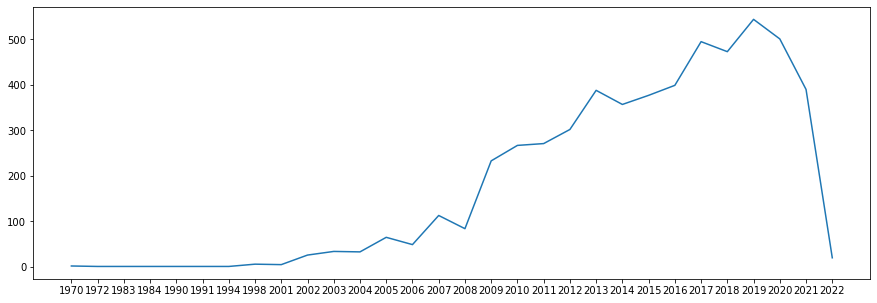

In [52]:
plt.figure(figsize=(15,5))
plt.plot(no_tedtalk_in_year1['year'], no_tedtalk_in_year1['no_tedtalk'])
plt.show()

#### let's also check like in each year

In [59]:
number_of_like_in_each_year=pd.read_sql('''SELECT year, sum(likes) as total_like FROM tedtalk0
GROUP BY year
ORDER BY year 
''', conn)
number_of_like_in_each_year

,year,total_like
0,1970,7500
1,1972,41000
2,1983,20000
3,1984,33000
4,1990,21000
5,1991,9800
6,1994,20000
7,1998,226100
8,2001,315100
9,2002,915700


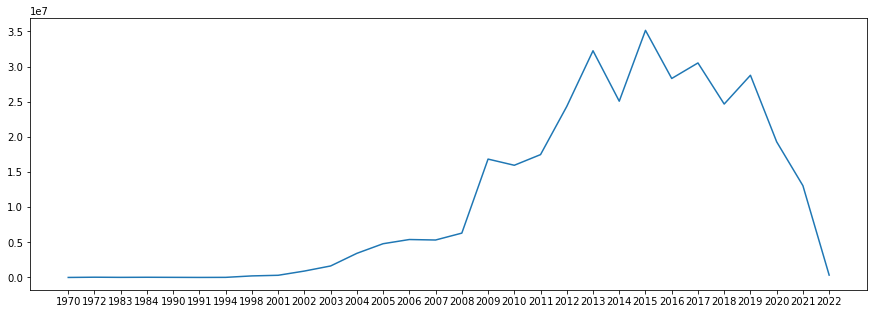

In [60]:
plt.figure(figsize=(15,5))
plt.plot(number_of_like_in_each_year['year'], number_of_like_in_each_year['total_like'])


#### here we can see in 2015 likes were maximum but after 2019 tedtalk like are decreasing  

### let's also check view

In [66]:
total_view_year=pd.read_sql('''SELECT year, sum(view) as total_view FROM tedtalk0
GROUP BY year
ORDER BY year
''', conn)
total_view_year

,year,total_view
0,1970,252000
1,1972,1300000
2,1983,690000
3,1984,1100000
4,1990,723000
5,1991,327000
6,1994,699000
7,1998,7410000
8,2001,10530000
9,2002,30442000


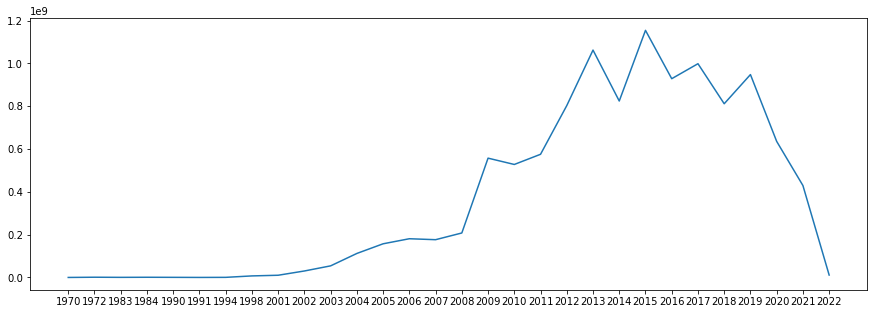

In [67]:
plt.figure(figsize=(15,5))
plt.plot(total_view_year['year'], total_view_year['total_view'])
plt.show()

#### view also behave like likes 

## I've Covered a lot of Interesting information for EDA This helps to get to know about ted talk Like what's the performanc of tedtalk in ethe last few years. Thank you for taking the time to check my work.

#### #### SQL Used
CREATE TABLE

INSERT INTO

SELECT

GROUP BY 

HAVING 

ORDER BY

CTE

WINDOW RANK FUNCTION 

LIMIT

AGGREGATE FUNCTION

DISTINCT FUNCTION